# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  The goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [28]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### 1.1
Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [29]:
df = pd.read_csv('./data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [30]:
rows = df['user_id'].count()
rows

294478

**c.** The number of unique users in the dataset.

In [31]:
unique_users = df['user_id'].nunique()
unique_users

290584

**d.** The proportion of users converted.

In [32]:
proportion_converted = df['converted'].sum()/df['converted'].count()
proportion_converted

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [33]:
df.query("(group == 'treatment' and landing_page == 'old_page')").shape[0]

1965

**f.** Do any of the rows have missing values?

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


None of the rows have missing values

### 1.2  

The `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`.

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


**a.** Create a new dataset that meets the specifications.  Store the new dataframe in **df2**.

In [35]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df_treatment_newpage = df.query('group == "treatment" and landing_page == "new_page"')
df_control_oldpage = df.query('group == "control" and landing_page == "old_page"')
frames = [df_treatment_newpage, df_control_oldpage]
df2 = pd.concat(frames)
print(df2.head())
print(df2.shape)

   user_id                   timestamp      group landing_page  converted
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
6   679687  2017-01-19 03:26:46.940749  treatment     new_page          1
8   817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9   839785  2017-01-15 18:11:06.610965  treatment     new_page          1
(290585, 5)


In [36]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### 1.3  

**a.** How many unique **user_id**s are in **df2**?

In [37]:
print(df2.shape[0])
print(df2.user_id.nunique())

290585
290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [38]:
df2['repeated_userid'] = df2.user_id.duplicated() # creating a column to verify wich row is duplicated
df2.query('repeated_userid == True') # looking the user_id duplicated

,user_id,timestamp,group,landing_page,converted,repeated_userid
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


**c.** Display the rows for the duplicate **user_id**? 

In [39]:
df2.query('user_id == 773192') # checking whats the index of the duplicateds user_id

,user_id,timestamp,group,landing_page,converted,repeated_userid
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [40]:
# Remove one of the rows with a duplicate user_id..
# in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(axis=0, index=2893, inplace=True) # drop the index 2893, that is one of the duplicated user_id
# Check again if the row with a duplicate user_id is deleted or not
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted,repeated_userid
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False


In [41]:
df2.drop('repeated_userid', axis=1, inplace=True) # droping the the column used to check the duplicated user_id
df2.head(1)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


### 1.4  

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>The probability represents the overall "converted" success rate in the population and I'll call it $p_{population}$.



In [15]:
Ppopulation = df2['converted'].mean()
Ppopulation

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
Pcontrol = df2.query('group == "control"').converted.mean()
Pcontrol

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
Ptreatment = df2.query('group == "treatment"').converted.mean()
Ptreatment

0.11880806551510564

>The probabilities computed above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups.

In [18]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = Ptreatment - Pcontrol
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [19]:
(df2.landing_page == "new_page").mean()

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**There is no evidence the treatment group leads to more conversions. The comvertion rate of the old page is slightly higher than the new page.**

<a id='ab_test'></a>
## Part II - A/B Test


### 2.1
For now, consider you need to make the decision just based on all the data provided.  

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  


>**$H_0: p_{new} - p_{old} \leq 0$**   
>**$H1: p_{new} - p_{old} > 0$**

### 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [42]:
# Pnew = Pold = Ppopulation
pnew = Ppopulation
pnew

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [43]:
# Pnew = Pold = Ppopulation
pold = Ppopulation
pold

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [44]:
nnew = (df2['landing_page'] == 'new_page').sum()
nnew

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [45]:
nold = (df2['landing_page'] == 'old_page').sum()
nold

145274

In [46]:
# Simulate a Sample for the treatment Group using numpy.random.choice()
new_page_converted = np.random.choice([0, 1], nnew, p=(1-pnew, pnew))
new_page_converted

array([1, 0, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [47]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], nold, p=(1-pold, pold))

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [48]:
diff_converted = new_page_converted.mean() - old_page_converted.mean()
diff_converted

0.001044196942156947


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [49]:
# Sampling distribution 
p_diffs = []
new_converted_simulation = np.random.binomial(nnew, pnew, 10000)/nnew
old_converted_simulation = np.random.binomial(nold, pold, 10000)/nold
p_diffs = new_converted_simulation - old_converted_simulation

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.

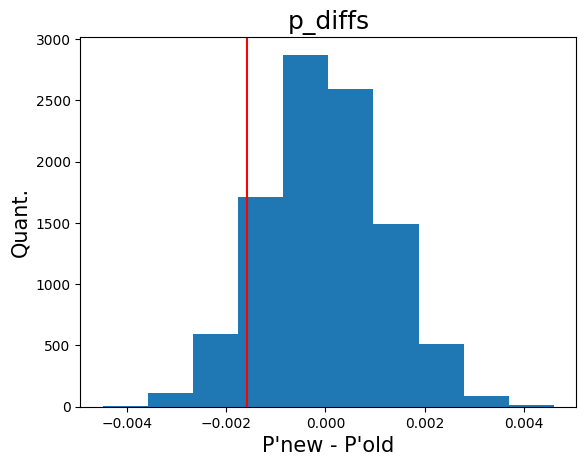

In [50]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color = 'red');
plt.title('p_diffs', fontsize = 18)
plt.xlabel("P'new - P'old", fontsize = 15);
plt.ylabel('Quant.', fontsize = 15);

> The plot is a normal curve from the sampling distribuition of the differences between hte probability converted in the new page and the old page.

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [32]:
p_diffs = np.array(p_diffs)
(p_diffs > obs_diff).mean()

0.907

**k.** Please explain in words what you have just computed in part **j** above.  

>The p-value is bigger than the type I error rate of 0.05, and we fail to reject H0. It means that the probability of converting in the new page is less than the old page. 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [58]:
import statsmodels.api as sm
# number of conversions with the old_page
convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
print("convert_old: {}".format(convert_old))
# number of conversions with the new_page
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]
print("convert_new: {}".format(convert_new))

# number of individuals who were shown the old_page
n_old = df2[df2['group'] == 'control'].shape[0]
print("n_old: {}".format(n_old))

# number of individuals who received new_page
n_new = df2[df2['group'] == 'treatment'].shape[0]
print("n_new: {}".format(n_new))


convert_old: 17489
convert_new: 17264
n_old: 145274
n_new: 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [62]:
import statsmodels.api as sm

In [63]:
countarray = [convert_new, convert_old]
countarray = np.array(countarray)
countarray

array([17264, 17489])

In [64]:
nobsarray = [n_new, n_old]
nobsarray = np.array(nobsarray)
nobsarray

array([145310, 145274])

In [65]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest(countarray, nobsarray, alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>The p-value calculated with z-test matches with the pvalue  in the part j.

<a id='regression'></a>
### Part III - A regression approach

### 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**We should perform the Logistic Regression.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [66]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [67]:
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2 = df2.rename(columns={"treatment":"ab_page"})
df2 = df2.drop('control', axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [68]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [69]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2023-02-17 12:09 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


>The hypotheses in the regression model are:
>
>$H_0: p_{new} − p_{old} = 0$  
>$H_1: p_{new} − p_{old} \neq 0$
>
>Now the hypothes is "equal or not" rather than "larger or not" as we did for part II and it is different because >this is a two-sided t-test compared to a one-sided t-test in part II.
>The p-value now is 0.1899 in part II the p-value was 0.9050. The p-value is bigger than the Type I error rate of >5%. 

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>The disavantages to adding additional terms are: multicollinearity, correlated errors, non-constant variance.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

In [71]:
# Read the countries.csv
df_countries = pd.read_csv('./data/countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [72]:
# Join with the df2 dataframe
df_new = df2.join(df_countries.set_index('user_id'), on='user_id')
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [73]:
# Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [74]:
logit_mod2 = sm.Logit(df_new['converted'],df_new[['intercept', 'ab_page', 'US', 'CA']])
results2 = logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2023-02-17 12:26 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

In [75]:
np.exp(-0.0149), np.exp(-0.0099), np.exp(-0.0506)

(0.9852104557227469, 0.9901488436829572, 0.9506588580330708)

In [76]:
1/np.exp(-0.0149), 1/np.exp(-0.0099), 1/np.exp(-0.0506)

(1.0150115583846535, 1.009949167117542, 1.0519020483004984)

> The P-values of the countries are bigger than the Type I error rate of 5%. We fail to reject the null hypothesis.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.**


In [77]:
df_new['ab_uk'] = df_new['ab_page'] * df_new['UK']
df_new['ab_us'] = df_new['ab_page'] * df_new['US']

In [78]:
logit_mod2 = sm.Logit(df_new['converted'],df_new[['intercept', 'ab_page', 'US', 'CA', 'ab_uk', 'ab_us']])
results2 = logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2023-02-17 12:26 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page      -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
ab_uk         0.0783    0.0568     1.3783  0.1681  -0.0330   0.1896
ab_us         0.0469    0.0538     0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

> All the p-values are bigger than the Type I error rate of 5%, so we fail to reject the null hypotheses

In [80]:
# lenth of the test
df2.timestamp.max(), df2.timestamp.min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

## Conclusion

>The difference observed in the diference between conversion rates -0.001578, show us that the convertion rate in >the old page is slightly bigger than the conversion rate in the new page.
>
>The hypothesis test, assuming the old page has a bigger converted rate and trying to prove that the new page has a >bigger converted rate are:
>
>**$H_0: p_{new} - p_{old} \leq 0$**  
>**$H1: p_{new} - p_{old} > 0$**
>
>A sampling distribuition was simulated and we got a p-value of 0.9084, comparing with the type I error rate we are >willing to accept of 0.05, we fail to reject H0, than the probability of the convertion rate of the old page seems >to be bigger.
>
>The regression aproach, I chose the logistic regression because it is a convertion or no conversion problem. The >hypotheses in the regression model are:
>
>$H_0: p_{new} − p_{old} = 0$  
>$H_1: p_{new} − p_{old} \neq 0$
>
>Now the hypothes is "equal or not" rather than "larger or not" as we did for part II and it is different because >this is a two-sided t-test compared to a one-sided t-test in part II.
>The p-value now is 0.1899 in part II the p-value was 0.9050. The p-value is bigger than the Type I error rate of >5%. 
>
>The p-value calculated is this aproach is 0.1899 bigger than the type I error rate we are willing to accept of >0.05. Then we added the country column, The P-values of the countries were bigger than the Type I error rate of >5%, so we fail to reject the null hypothesis.
>
>In conclusion, the old page has a bigger probability to convert the sales, and I recommend not to implement the >new page. Although, the experiment occurred for 22 days, I would reccomend to keep running the test a bit more >longer.